In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pandas_datareader
import pandas_datareader.data as web

In [2]:
# data de inicio e fim, com contagem dos dias no ano
start= pd.to_datetime('2018-05-01')
end= pd.to_datetime('2020-12-27')
days=365 #melhorar a contagem para days=len(pd.date_range(start=startdt,end=enddt,freq='D'))

In [3]:
#automatizar o processo, criar uma lista de colunas, aumentar o numero de ativos
btc = web.DataReader('BTC-USD','yahoo',start, end)
eth = web.DataReader('ETH-USD','yahoo',start, end)
ltc = web.DataReader('LTC-USD','yahoo',start, end)
dash = web.DataReader('DASH-USD','yahoo',start, end)

In [4]:
#se aumentar o numero de ativos, automatizar para .count
number_sec = 4

In [5]:
btc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-04-30,9255.879883,8891.049805,9251.469727,9119.009766,7713019904,9119.009766
2018-05-01,9256.519531,9015.139648,9104.599609,9235.919922,7558159872,9235.919922
2018-05-02,9798.330078,9188.150391,9233.969727,9743.860352,10207299584,9743.860352
2018-05-03,9779.200195,9585.959961,9695.500000,9700.759766,8217829888,9700.759766
2018-05-04,9964.500000,9695.120117,9700.280273,9858.150391,7651939840,9858.150391


In [6]:
#eliminando outras colunas para ficar apenas Close. Em cripto não faz sentido "adj Close"
btc.drop(['High','Low','Open','Volume','Adj Close'], axis=1,inplace=True)
eth.drop(['High','Low','Open','Volume','Adj Close'], axis=1,inplace=True)
ltc.drop(['High','Low','Open','Volume','Adj Close'], axis=1,inplace=True)
dash.drop(['High','Low','Open','Volume','Adj Close'], axis=1,inplace=True)

In [7]:
#concatenar para o o já fracionado 'Close'
crypto = pd.concat([btc,eth,ltc,dash],axis=1) 
#mudar os headers da colunas
crypto.columns = ['BTC','ETH','LTC','DASH']

In [8]:
crypto.head()

,BTC,ETH,LTC,DASH
Date,,,,
2018-04-30,9119.009766,673.612976,148.488007,478.897003
2018-05-01,9235.919922,687.148987,151.576996,481.489990
2018-05-02,9743.860352,779.543030,161.459000,503.317993
2018-05-03,9700.759766,785.624023,168.787994,486.322998
2018-05-04,9858.150391,816.119995,177.761993,505.714996


In [9]:
#retorno diario médio
mean_daily_ret = crypto.pct_change(1).mean()
mean_daily_ret

BTC     0.001776
ETH     0.001235
LTC     0.001068
DASH   -0.000181
dtype: float64

In [10]:
#Checar correlação entre elas:
crypto.pct_change(1).corr()

,BTC,ETH,LTC,DASH
BTC,1.000000,0.830396,0.807557,0.691283
ETH,0.830396,1.000000,0.845143,0.720066
LTC,0.807557,0.845143,1.000000,0.696447
DASH,0.691283,0.720066,0.696447,1.000000


<AxesSubplot:xlabel='Date'>

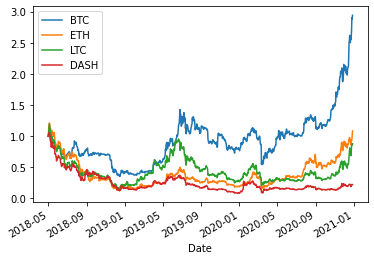

In [11]:
crypto_normed = crypto/crypto.iloc[0]
crypto_normed.plot()

In [12]:
#aqui poderia escolher entre log ou aritmetico...usar log!

In [13]:
log_ret = np.log(crypto/crypto.shift(1))
log_ret.head()

,BTC,ETH,LTC,DASH
Date,,,,
2018-04-30,NaN,NaN,NaN,NaN
2018-05-01,0.012739,0.019895,0.020590,0.005400
2018-05-02,0.053537,0.126157,0.063158,0.044337
2018-05-03,-0.004433,0.007770,0.044392,-0.034349
2018-05-04,0.016094,0.038083,0.051802,0.039100


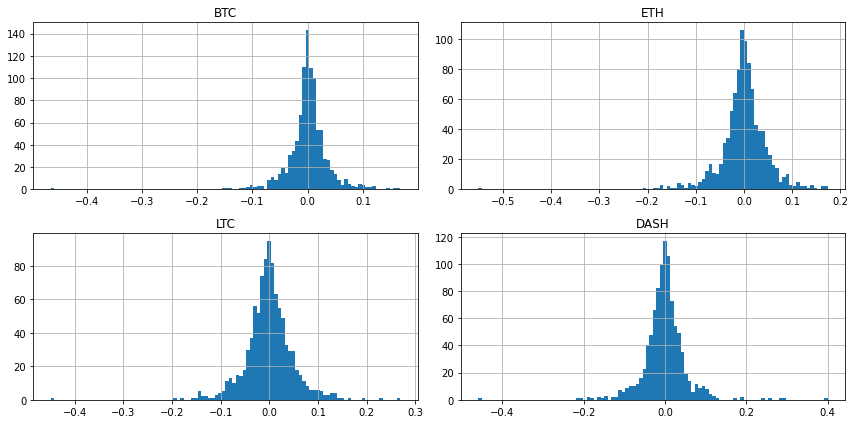

In [14]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [15]:
#analisando um pouco dos resultados
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BTC,972.0,0.001110,0.036872,-0.464730,-0.012205,0.001273,0.014967,0.167104
ETH,972.0,0.000083,0.048591,-0.550732,-0.019380,0.000477,0.022708,0.173452
LTC,972.0,-0.000134,0.049236,-0.449062,-0.024259,-0.000881,0.023669,0.268725
DASH,972.0,-0.001545,0.052135,-0.459331,-0.024029,-0.001023,0.019940,0.399625


In [16]:
log_ret.mean() * days #BTC teve uma media de retorno de 64% ao ano (versão Dec 2020)

BTC     0.405055
ETH     0.030364
LTC    -0.049058
DASH   -0.563936
dtype: float64

In [17]:
log_ret.cov()

,BTC,ETH,LTC,DASH
BTC,0.001360,0.001515,0.001491,0.001397
ETH,0.001515,0.002361,0.002052,0.001917
LTC,0.001491,0.002052,0.002424,0.001888
DASH,0.001397,0.001917,0.001888,0.002718


In [18]:
log_ret.cov()*days

,BTC,ETH,LTC,DASH
BTC,0.496243,0.552924,0.544065,0.510050
ETH,0.552924,0.861790,0.748842,0.699712
LTC,0.544065,0.748842,0.884832,0.689192
DASH,0.510050,0.699712,0.689192,0.992091


In [19]:
#agora vamos fazer alocaçãoes randomicas

In [20]:
# seed (opcional) ,,,,101 é um numero arbitrario
np.random.seed(101)

# lembrar das colunas
print('Cryptos')
print(crypto.columns)
print('\n')

# criar pesos aleatorios: cria 4 pesos diferentes, mas a soma deles não é 1
print('Creating Random Weights')
weights = np.array(np.random.random(number_sec))
print(weights)
print('\n')

# rebalancear pesos: agora a soma dos pesos é 1
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# retorno esperado...multiplica os retornos diario pelos pesos e multiplica por 365
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) * days
print(exp_ret)
print('\n')

# variancia esperada (volatilidade)
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * days, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Cryptos
Index(['BTC', 'ETH', 'LTC', 'DASH'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.09974158909520611


Expected Volatility
0.7935580344238486


Sharpe Ratio
0.12568909237699552


In [21]:
#agora vamos pegar esse processo e repetir centenas de vezes para chegar aconclusão sobre a alocação de portfolio

In [22]:
num_ports = 50000

#zerando os valores apos retornarem do loop
all_weights = np.zeros((num_ports,len(crypto.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): #maioria das equações abaixo paermancem, mas colocou um loop

    # Create Random Weights
    weights = np.array(np.random.random(number_sec))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *days)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * days, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [23]:
#melhor sharp ratio
sharpe_arr.max()

0.5103083351144435

In [24]:
#qual a posição dele...
sharpe_arr.argmax()

13012

In [25]:
# Columns lembrar das colunas
print('Cryptos')
print(crypto.columns)
print('\n')

Cryptos
Index(['BTC', 'ETH', 'LTC', 'DASH'], dtype='object')




In [26]:
#e qual a composição...quase tudo em BTC e ETH :-)
all_weights[sharpe_arr.argmax(),:]

#criar um tabela que integra (concatena) os indexes de cripto e os valores de % comp gerados

array([8.93922205e-01, 1.02851483e-01, 2.67532666e-03, 5.50985466e-04])

In [27]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

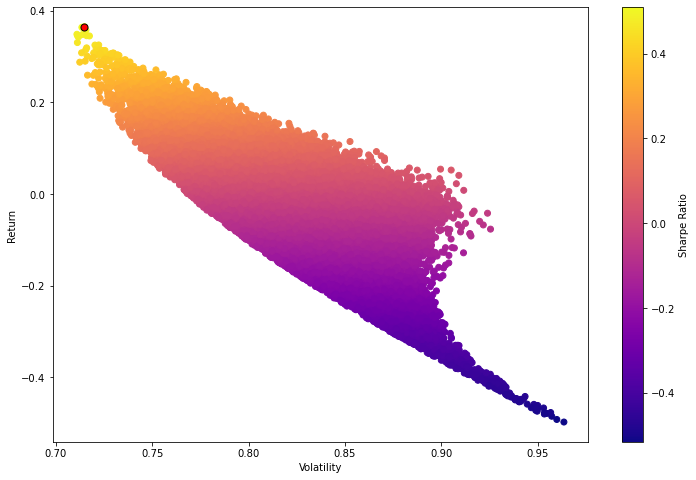

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

# adicionar um ponto vermelho para o melhor Sharpe Ratio
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

In [29]:
#Mathematical Optimization
# funcionalização de retorno e Sharpe Ratio
#é uma alternativa ao metodo acima de alocação aleatoria, nesse caso utiliza equação...

In [30]:
#criar uma função para mostrar ret,vol e sr
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * days
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * days, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [31]:
from scipy.optimize import minimize #para mais info help(minimize)

In [32]:
#o que queremos minimizar...negative sharp ratio...get_ret_vol_sr(weights)[2] * -1 [2]: posição 3 na função é sr, depois multiplica por -1
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [33]:
# Contraints...minimizar os checks
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [34]:
check_sum(weights)

-2.220446049250313e-16

In [35]:
# Por convenção de função minimizar deve ser uma função que retorna zero para condições
cons = ({'type':'eq','fun': check_sum})
# 0-1 para cada peso..de 0 a 1
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
# Chutes iniciais (distribuição igual)
init_guess = [0.25,0.25,0.25,0.25]
# Sequential Least SQuares Programming (SLSQP). Checar o dicionario para outos metodos de calculo
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [36]:
opt_results

     fun: -0.5749990491168887
     jac: array([-0.        ,  0.59757281,  0.70005172,  1.39153644])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.00000000e+00, 6.10622664e-16, 2.77555756e-17, 0.00000000e+00])

In [37]:
opt_results.x

array([1.00000000e+00, 6.10622664e-16, 2.77555756e-17, 0.00000000e+00])

In [38]:
get_ret_vol_sr(opt_results.x)

array([0.40505527, 0.70444511, 0.57499905])

In [39]:
#maximo retorno de 81%, maximo volatilidade de 92% e maximo SR de 0.87...esse numero deveria ser comparavel ao obtido no grafco acima
#é uma alternativa ao metodo acima de alocação aleatoria, nesse caso utiliza equação...

In [40]:
# Validação da efficient frontier

In [41]:
#All Optimal Portfolios (Efficient Frontier)
#A fronteira eficiente é o conjunto de carteiras ideais que oferece o maior retorno esperado para um nível de risco definido
#ou o menor risco para um determinado nível de retorno esperado. Carteiras que ficam abaixo da fronteira eficiente 
#são sub-ótimas, pois não fornecem retorno suficiente para o nível de risco. 
# Carteiras que se agrupam à direita da fronteira eficiente também são sub-ótimas, 
#pois possuem maior nível de risco para a taxa de retorno definida.
# http://www.investopedia.com/terms/e/efficientfrontier

In [42]:
#Os retornos vão de 0 até um numero próximo a 0.3
# criar numeros de pontos no linspace para calcular xn
frontier_y = np.linspace(0,0.3,100) # Se o computador é rápido, pode colocar mais de 100

In [43]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] #agora minimizando o segundo termo da equação get_ret_vol_sr...volatilidade [1]

In [44]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

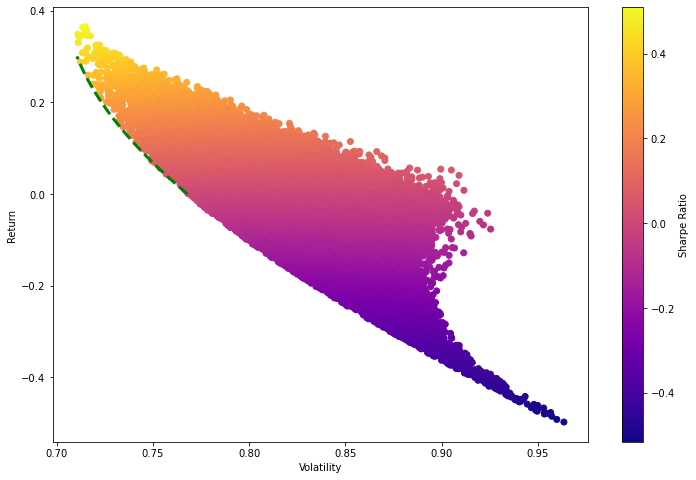

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);